In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import spacy
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from collections import Counter
import string
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

Found GPU at: /device:GPU:0


In [4]:
# load data
data = pd.read_csv('/content/lyric-full_df.csv', engine='python', error_bad_lines=False).sample(frac=.8, replace=True, random_state=0)

data

,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment
9634,1975-07-26,24626,http://www.billboard.com/charts/hot-100/1975-0...,75,The Proud One,The Osmonds,The Proud OneThe Osmonds,1,NaN,75,1,Livin is dyin\nCause love youve left me cryin\...,0.160684
12850,1982-11-27,18692,http://www.billboard.com/charts/hot-100/1982-1...,84,The Elvis Medley,Elvis Presley,The Elvis MedleyElvis Presley,1,NaN,84,1,825 ALL NIGHT â PAROV STELAR\n824 BIG JET PL...,0.141266
23257,2012-09-29,17396,http://www.billboard.com/charts/hot-100/2012-0...,95,It's Time,Glee Cast,It's TimeGlee Cast,1,NaN,95,1,[BLAINE]\nSo this is what you meant\nWhen you ...,-0.014922
23126,2012-05-05,27419,http://www.billboard.com/charts/hot-100/2012-0...,97,Tonight (Best You Ever Had),John Legend Featuring Ludacris,Tonight (Best You Ever Had)John Legend Featuri...,1,NaN,97,1,[Verse 1: John Legend]\nAlright\nAin't this wh...,0.483707
14267,1986-05-31,9901,http://www.billboard.com/charts/hot-100/1986-0...,73,Stick Around,Julian Lennon,Stick AroundJulian Lennon,1,44.0,32,11,If you want to tell me something new\nI might ...,0.197868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16028,1991-03-23,25522,http://www.billboard.com/charts/hot-100/1991-0...,88,Wrap My Body Tight,Johnny Gill,Wrap My Body TightJohnny Gill,1,NaN,88,1,[Verse 1:]\nI fell out of bed\nThis morning\nO...,0.290747
22339,2010-08-21,24450,http://www.billboard.com/charts/hot-100/2010-0...,96,The Man Who Can't Be Moved,The Script,The Man Who Can't Be MovedThe Script,1,NaN,96,1,[Verse 1]\nGoing back to the corner where I fi...,0.024306
18663,1999-07-24,12510,http://www.billboard.com/charts/hot-100/1999-0...,29,Amazed,Lonestar,AmazedLonestar,1,29.0,29,8,[Verse 1]\nEvery time our eyes meet\nThis feel...,0.187500
18851,2000-03-11,26687,http://www.billboard.com/charts/hot-100/2000-0...,80,The Way You Love Me,Faith Hill,The Way You Love MeFaith Hill,1,NaN,80,1,[Verse 1]\nIf I could grant\nYou one wish\nI'd...,0.349806


In [5]:
# lyrics
#data['Lyrics'][20]

In [6]:
data.shape

(20910, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20910 entries, 9634 to 22833
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   WeekID                  20910 non-null  object 
 1   Unnamed: 0              20910 non-null  int64  
 2   url                     20910 non-null  object 
 3   Week Position           20910 non-null  int64  
 4   Song                    20910 non-null  object 
 5   Performer               20910 non-null  object 
 6   SongID                  20910 non-null  object 
 7   Instance                20910 non-null  int64  
 8   Previous Week Position  9019 non-null   float64
 9   Peak Position           20910 non-null  int64  
 10  Weeks on Chart          20910 non-null  int64  
 11  Lyrics                  20910 non-null  object 
 12  Sentiment               20910 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [8]:
data.isnull().sum()

WeekID                        0
Unnamed: 0                    0
url                           0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    11891
Peak Position                 0
Weeks on Chart                0
Lyrics                        0
Sentiment                     0
dtype: int64

In [9]:
data['lyric_length'] = data['Lyrics'].apply(lambda x: len(x.split()))

In [10]:
songs = data.copy()[['WeekID', 'Song', 'Performer', 'Lyrics', 'Sentiment', 'lyric_length']]

songs.head()

,WeekID,Song,Performer,Lyrics,Sentiment,lyric_length
9634,1975-07-26,The Proud One,The Osmonds,Livin is dyin\nCause love youve left me cryin\...,0.160684,112
12850,1982-11-27,The Elvis Medley,Elvis Presley,825 ALL NIGHT â PAROV STELAR\n824 BIG JET PL...,0.141266,5781
23257,2012-09-29,It's Time,Glee Cast,[BLAINE]\nSo this is what you meant\nWhen you ...,-0.014922,318
23126,2012-05-05,Tonight (Best You Ever Had),John Legend Featuring Ludacris,[Verse 1: John Legend]\nAlright\nAin't this wh...,0.483707,404
14267,1986-05-31,Stick Around,Julian Lennon,If you want to tell me something new\nI might ...,0.197868,150


In [11]:
songs.corr()

,Sentiment,lyric_length
Sentiment,1.000000,-0.056401
lyric_length,-0.056401,1.000000


In [12]:
songs[['Sentiment', 'lyric_length']].describe()

,Sentiment,lyric_length
count,20910.000000,20910.000000
mean,0.127870,2275.112099
std,0.170610,11318.851848
min,-0.937500,1.000000
25%,0.020692,200.000000
50%,0.113605,287.000000
75%,0.236962,480.000000
max,1.000000,152084.000000


In [13]:
songs['WeekID'].unique()

array(['1975-07-26', '1982-11-27', '2012-09-29', ..., '1993-12-18',
       '2013-04-20', '2013-03-23'], dtype=object)

In [14]:
from helpers_ori import lyrics_to_words, clean_lyrics
import nltk

nltk.download('popular')
# function from helpers
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

clean_lyrics(songs, 'Lyrics')

# List used to store the words

lyrica = []

# Iterate each lyric and split unique words appending the result into the words list

songs = songs.reset_index(drop=True)
for lyric in songs['Lyrics'].tolist():
    lyrica.append(unique(lyrics_to_words(lyric).split()))

# Create the new column with the information of words lists 

new_songs = songs
new_songs['words'] = lyrica

new_songs.head()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

,WeekID,Song,Performer,Lyrics,Sentiment,lyric_length,words
0,1975-07-26,The Proud One,The Osmonds,livin is dyin cause love youve left me cryin n...,0.160684,112,"[livin, dyin, cause, love, youve, left, cryin,..."
1,1982-11-27,The Elvis Medley,Elvis Presley,85 all night â parov stelar 84 big jet plane â...,0.141266,5781,"[85, night, â, parov, stelar, 84, big, jet, pl..."
2,2012-09-29,It's Time,Glee Cast,blaine so this is what you meant when you said...,-0.014922,318,"[blaine, meant, said, spent, time, build, bott..."
3,2012-05-05,Tonight (Best You Ever Had),John Legend Featuring Ludacris,john legend alright ain't this what you came f...,0.483707,404,"[john, legend, alright, aint, came, wish, girl..."
4,1986-05-31,Stick Around,Julian Lennon,if you want to tell me something new i might s...,0.197868,150,"[want, tell, something, new, might, stick, aro..."


In [15]:
songs.head()

,WeekID,Song,Performer,Lyrics,Sentiment,lyric_length,words
0,1975-07-26,The Proud One,The Osmonds,livin is dyin cause love youve left me cryin n...,0.160684,112,"[livin, dyin, cause, love, youve, left, cryin,..."
1,1982-11-27,The Elvis Medley,Elvis Presley,85 all night â parov stelar 84 big jet plane â...,0.141266,5781,"[85, night, â, parov, stelar, 84, big, jet, pl..."
2,2012-09-29,It's Time,Glee Cast,blaine so this is what you meant when you said...,-0.014922,318,"[blaine, meant, said, spent, time, build, bott..."
3,2012-05-05,Tonight (Best You Ever Had),John Legend Featuring Ludacris,john legend alright ain't this what you came f...,0.483707,404,"[john, legend, alright, aint, came, wish, girl..."
4,1986-05-31,Stick Around,Julian Lennon,if you want to tell me something new i might s...,0.197868,150,"[want, tell, something, new, might, stick, aro..."


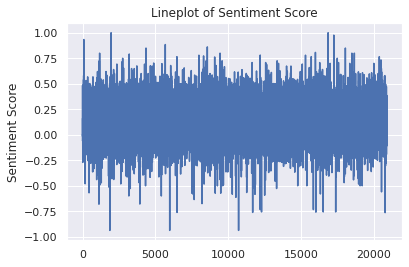

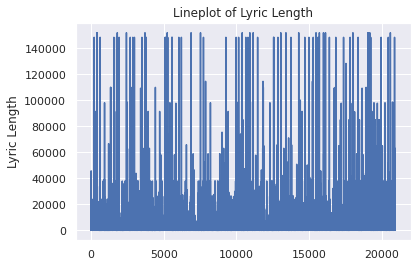

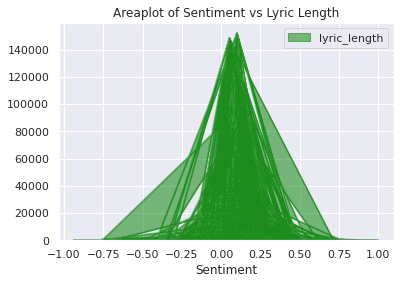

In [16]:
new_songs['Sentiment'].plot()
plt.ylabel('Sentiment Score')
plt.title('Lineplot of Sentiment Score')
plt.show();
new_songs['lyric_length'].plot()
plt.ylabel('Lyric Length')
plt.title('Lineplot of Lyric Length')
plt.show();
new_songs[['Sentiment', 'lyric_length']].plot(kind='area', y='lyric_length', x='Sentiment', stacked=False, color='green')
plt.title('Areaplot of Sentiment vs Lyric Length')
plt.show();

## Convert Sentiments to Discrete Values

In [17]:
# transform sentiments to discrete variable

labels = []

for i in new_songs['Sentiment']:
  if i < .075:
    labels.append(0)
  elif i > 0.15:
    labels.append(2)
  else: 
    labels.append(1)

new_songs['label'] = labels


#new_songs['Sentiment'].loc[new_songs['Sentiment'] < -0.25] = 'neg'
#new_songs['Sentiment'][~new_songs['Sentiment'].between(-0.25,0.25)] = 'neu'
#new_songs['Sentiment'].loc[new_songs['Sentiment'] > 0.25] = 'pos'

new_songs['label'] = new_songs['label'].astype('category')

new_songs.head()

,WeekID,Song,Performer,Lyrics,Sentiment,lyric_length,words,label
0,1975-07-26,The Proud One,The Osmonds,livin is dyin cause love youve left me cryin n...,0.160684,112,"[livin, dyin, cause, love, youve, left, cryin,...",2
1,1982-11-27,The Elvis Medley,Elvis Presley,85 all night â parov stelar 84 big jet plane â...,0.141266,5781,"[85, night, â, parov, stelar, 84, big, jet, pl...",1
2,2012-09-29,It's Time,Glee Cast,blaine so this is what you meant when you said...,-0.014922,318,"[blaine, meant, said, spent, time, build, bott...",0
3,2012-05-05,Tonight (Best You Ever Had),John Legend Featuring Ludacris,john legend alright ain't this what you came f...,0.483707,404,"[john, legend, alright, aint, came, wish, girl...",2
4,1986-05-31,Stick Around,Julian Lennon,if you want to tell me something new i might s...,0.197868,150,"[want, tell, something, new, might, stick, aro...",2


In [18]:
# Count of Sentiment Classes

Counter(new_songs['label'])

Counter({0: 8203, 1: 4090, 2: 8617})

In [19]:
new_songs['label'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False)

## Baseline Model

In [20]:
from sklearn.model_selection import train_test_split

lyrics = new_songs['words']
y = new_songs['label']

lyrics_train, lyrics_test, y_train, y_test = train_test_split(lyrics,y,
                                                             test_size=.25,
                                                             random_state=0)

In [21]:
# Create BoW

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_bow = vectorizer.fit_transform(' '.join(text) for text in lyrics_train)
test_bow = vectorizer.transform(' '.join(text) for text in lyrics_test)

X_train = train_bow
X_test  = test_bow
X_train

<15682x226678 sparse matrix of type '<class 'numpy.int64'>'
	with 5786702 stored elements in Compressed Sparse Row format>

In [22]:
# baseline logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print('Accuracy', accuracy_score(y_test, pred), '\n')
#print('ROC AUC:', roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy 0.8031752104055088 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2079
           1       0.67      0.62      0.65       997
           2       0.83      0.85      0.84      2152

    accuracy                           0.80      5228
   macro avg       0.78      0.77      0.77      5228
weighted avg       0.80      0.80      0.80      5228



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Unigram & Bigrams Logistic Reg

vectorizer = CountVectorizer(ngram_range=(1,2))

train_bow = vectorizer.fit_transform(' '.join(text) for text in lyrics_train)
test_bow = vectorizer.transform(' '.join(text) for text in lyrics_test)

X_train = train_bow
X_test  = test_bow
X_train

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print('Accuracy', accuracy_score(y_test, pred), '\n')
#print('ROC AUC:', roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))
pickle.dump(clf, open('uni & bi log', 'wb'))

In [ ]:
# Bigrams Logistic Reg

vectorizer = CountVectorizer(ngram_range=(2,2))

train_bow = vectorizer.fit_transform(' '.join(text) for text in lyrics_train)
test_bow = vectorizer.transform(' '.join(text) for text in lyrics_test)

X_train = train_bow
X_test  = test_bow
X_train

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print('Accuracy', accuracy_score(y_test, pred), '\n')
#print('ROC AUC:', roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))
pickle.dump(clf, open('bigram log', 'wb'))

In [ ]:
#Grid Search

from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25],
               'class_weight': ['balanced', None]}

log_grid = GridSearchCV(estimator = clf, 
                            param_grid = grid_values,
                            scoring = 'accuracy',
                            cv = 3,
                            verbose = 2,
                            n_jobs = 2)

log_grid.fit(X_train, y_train.values.ravel())

# Confusion Matrix Plot

plot_confusion_matrix(log_grid, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show();

#Predict values based on new parameters

pred = log_grid.predict(X_test)

con_mat = confusion_matrix(y_test, pred)

print('Confusion Matrix:\n', con_mat)

print('Misclassification Rate:', mis_class(con_mat))

print('Training Accuracy:', log_grid.score(X_train,y_train))
print('Testing Accuracy:', accuracy_score(y_test, pred))
print('Classification Report:\n', classification_report(y_test, pred))

## CNN's

**Note:** Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s CountVectorizer.

With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

In [24]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# calculate the maximum document length
def max_length(lines):
	return max([len(s) for s in lines])
 
# encode a list of lines
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded
 
# define the model
def define_model(length, vocab_size):
	# channel 1
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 100)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 100)(inputs2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# channel 3
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 100)(inputs3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(1, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	plot_model(model, show_shapes=True, to_file='multichannel.png')
	return model
 
# create tokenizer
tokenizer = create_tokenizer(lyrics_train)
# calculate max document length
length = max_length(lyrics_train)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, lyrics_train, length)
print(trainX.shape)
 
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], array(y_train), epochs=10, batch_size=16)
# save the model
model.save('Kim/Cano CNN')

Max document length: 11489
Vocabulary size: 226727
(15682, 11489)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 11489)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 11489)]      0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 11489)]      0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 11489, 100)   22672700    input_1[0][0]                    
_____________________

In [27]:
# report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

TypeError: ignored